## Fake news prediction

About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake --- 
         1: Fake news
         0: real News

### import neccesary libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

#### Imporing Dataset

In [38]:
df=pd.read_csv('E:/ML projects/22.Fake news prediction/dataset/news.csv')

In [39]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### downloading the stopwords

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Printing the stopwords

In [41]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [43]:
df.shape

(20800, 5)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [45]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [46]:
# counting the number of missing values in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [47]:
# replacing the null values with empty string
news_dataset = df.fillna('')

In [48]:
# merging the author name and news title
df['content'] = df['author']+' '+df['title']

### plotting worldcloud 
#### "A word cloud visually highlights the most frequent terms in a text, offering a quick insight into key themes and topics."

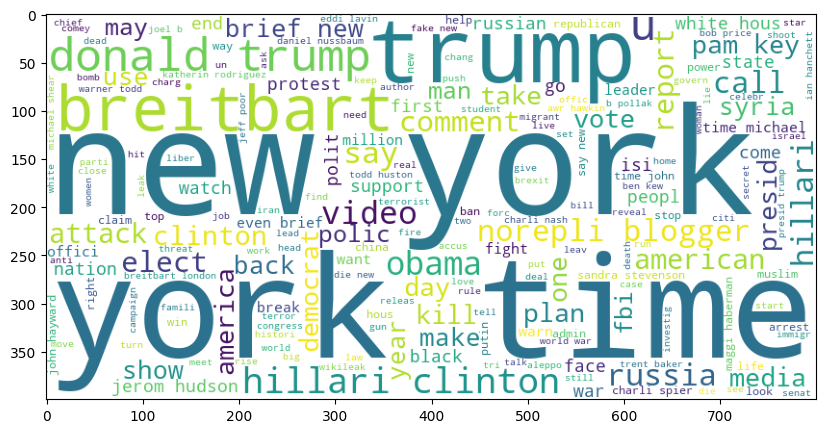

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['content'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.show()


In [49]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [50]:
df = df.dropna(subset=['content'])

### Stemming:

#### Stemming is the process of reducing a word to its Root word

In [54]:
from nltk.stem import PorterStemmer

In [55]:
ps=PorterStemmer()

In [56]:
import re

In [57]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [58]:
df['content'] = df['content'].apply(stemming)

In [59]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object


In [61]:
#separating the data and label
X = df['content'].values
Y = df['label'].values

In [62]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [63]:
Y

array([1, 0, 1, ..., 0, 1, 1])

#### Converting The textual data to numerical data

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [67]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 195053 stored elements and shape (18285, 15960)>
  Coords	Values
  (0, 247)	0.26982554594264346
  (0, 2312)	0.3745612250433202
  (0, 2757)	0.2466340295002162
  (0, 3359)	0.3609049070394367
  (0, 3543)	0.2684494960336511
  (0, 4637)	0.23016077319140021
  (0, 6552)	0.21745594418933306
  (0, 7190)	0.24556189342497173
  (0, 8048)	0.29347549279156676
  (0, 8310)	0.3609049070394367
  (0, 12567)	0.25566372256502734
  (0, 14626)	0.2853880981846006
  (1, 1391)	0.2961798071396214
  (1, 1764)	0.15099851642776987
  (1, 2066)	0.3819189043603919
  (1, 2619)	0.1936832753563371
  (1, 3328)	0.2623789770430963
  (1, 5140)	0.7119376870709987
  (1, 6377)	0.19285723710368194
  (1, 15663)	0.30530279633389806
  (2, 2743)	0.31437590974242646
  (2, 2895)	0.4581003415623782
  (2, 5031)	0.38709995799949964
  (2, 5579)	0.3490632212946542
  (2, 8973)	0.4948460479407663
  :	:
  (18282, 3399)	0.21709587881547218
  (18282, 6585)	0.21510476155370073
  (1828

#### Splitting the data for training and testing

In [68]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=42)
 

#### MOdel training

In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [70]:
lr

LogisticRegression()

In [71]:
lr.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred=lr.predict(x_test)

#### Model Evaluation

In [80]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Classification Report : \n",classification_report(y_test,y_pred))


Accuracy score :  0.9785651793525809
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2600
           1       0.96      0.99      0.98      1972

    accuracy                           0.98      4572
   macro avg       0.98      0.98      0.98      4572
weighted avg       0.98      0.98      0.98      4572

